In [ ]:
## This dataset basically consists of crop yield and the factors affecting it.
## Originally, extracted from world bank data and was published in Kaggle
## In this personal project I will be performing EDA, and implement  machine learning algorithms 
## like Random Forest and Gradient Boosting Machine's LightGBM to predict crop yield

In [88]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [89]:
#reading the datafile and storing it in dataframe df
df = pd.read_csv(r'C:\Users\utkar\Downloads\Folder for output\yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [90]:
#deleting the unnecessary column
df = df.drop(df.columns[0], axis=1)

In [91]:
#observing the updated dataset
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [92]:
#performing exploratory data analysis see figure out patterns in the dataset
#checking the data types and their properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [93]:
#checking the summary statistics of each variable
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [94]:
#Checking for missing values
#no missing values found
df.replace('Missing',np.nan,inplace=True)
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [95]:
#renaming target variable
df['yield'] = df['hg/ha_yield']
df.drop('hg/ha_yield',axis=1,inplace=True)

In [96]:
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.0,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.0,16.37,7000


Text(0, 0.5, 'yield')

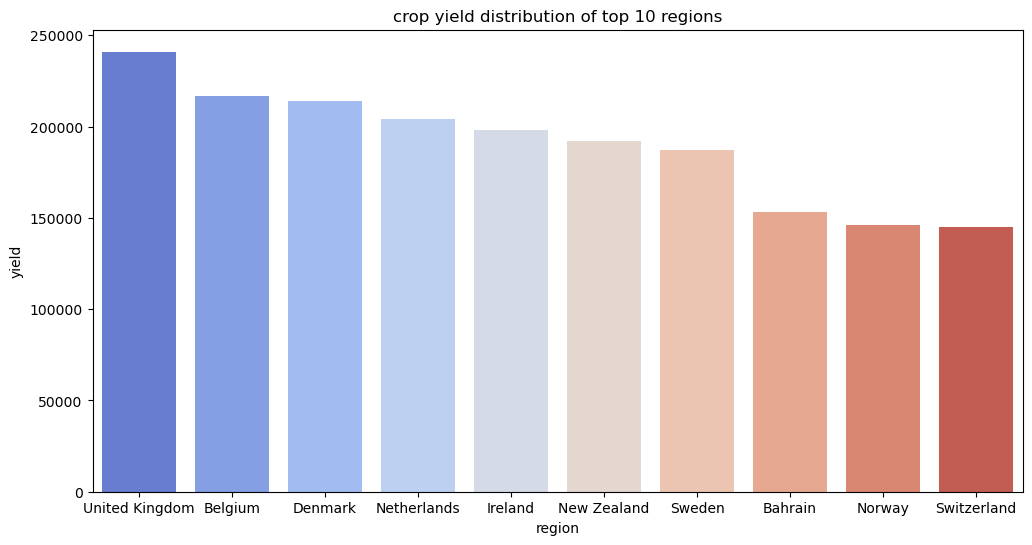

In [97]:
#observe crop yield distribution of top 10 regions
yield_top_10_region = df.groupby('Area')['yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=yield_top_10_region.index, y=yield_top_10_region.values,palette='coolwarm')
plt.title('crop yield distribution of top 10 regions')
plt.xlabel('region')
plt.ylabel('yield')

Text(0, 0.5, 'yield')

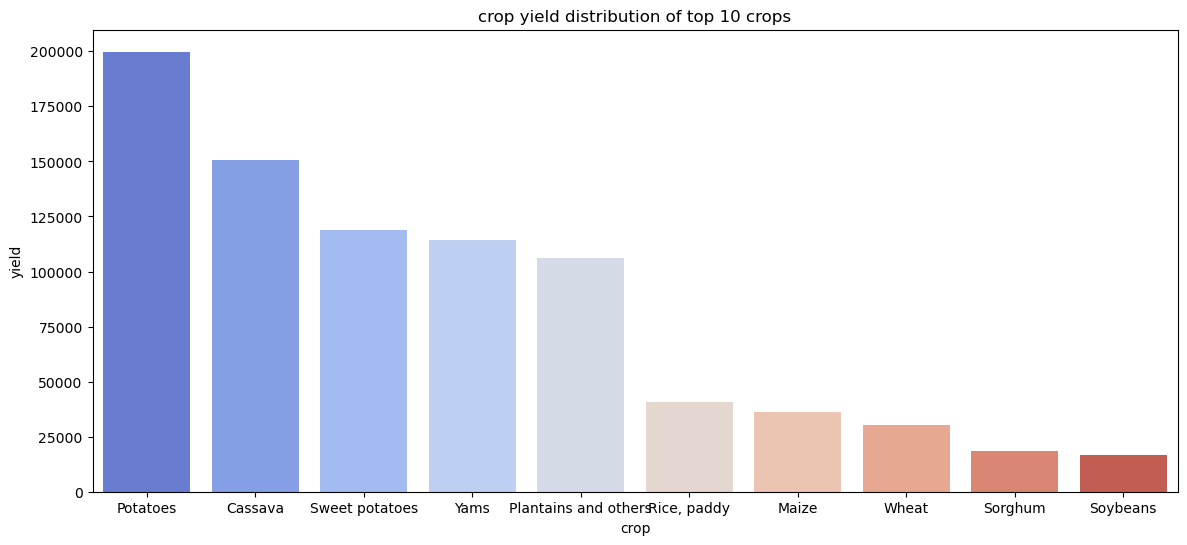

In [98]:
#observe crop yield distribution of top 10 crops
yield_top_10_crops = df.groupby('Item')['yield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x=yield_top_10_crops.index,y=yield_top_10_crops.values,palette='coolwarm')
plt.title('crop yield distribution of top 10 crops')
plt.xlabel('crop')
plt.ylabel('yield')

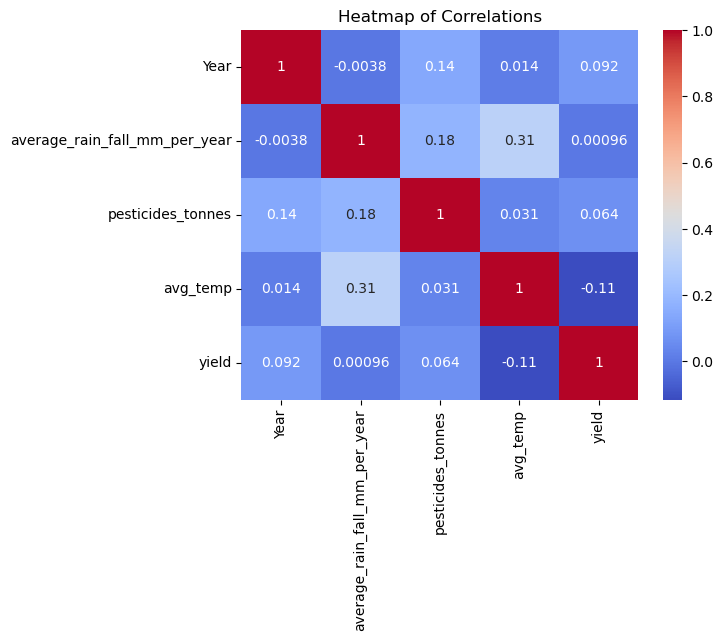

In [99]:
#check correlation b/w numeric features of the dataset
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

Text(0.5, 1.0, 'Yield variation in recent years')

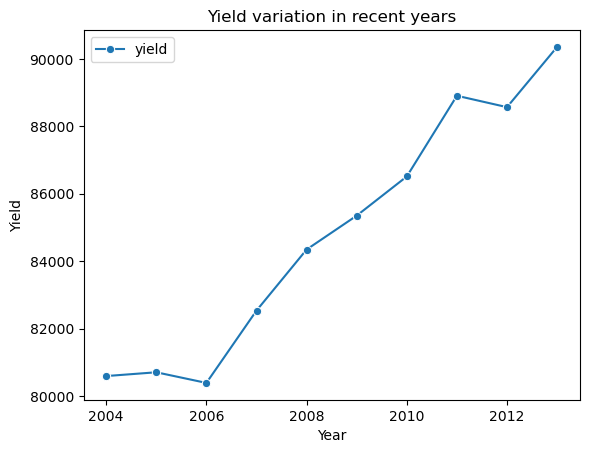

In [100]:
#observe yield variation in recent years
yield_recent_years = df.groupby('Year')['yield'].mean().sort_values(ascending=False).head(10)
sns.lineplot(x=yield_recent_years.index,y=yield_recent_years.values,data=yield_recent_years,marker='o',label='yield')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield variation in recent years')

Text(0.5, 1.0, 'Yield variation in early years')

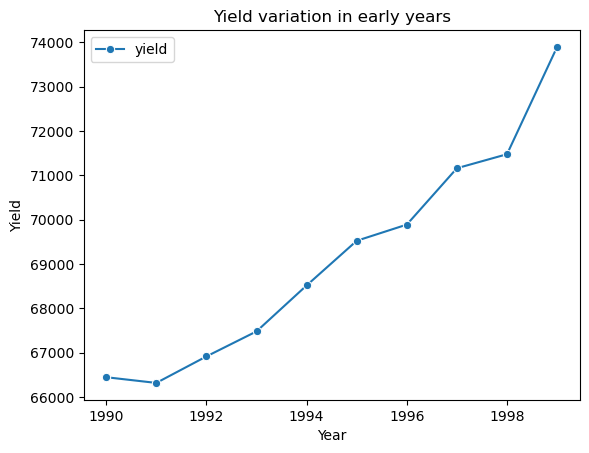

In [101]:
#observe yield variation in early years
yield_recent_years = df.groupby('Year')['yield'].mean().sort_values(ascending=True).head(10)
sns.lineplot(x=yield_recent_years.index,y=yield_recent_years.values,data=yield_recent_years,marker='o',label='yield')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield variation in early years')

In [102]:
rainfall_yield_relation = df.groupby('average_rain_fall_mm_per_year')['yield'].mean().sort_values(ascending=False).head(10)
rainfall_yield_relation

average_rain_fall_mm_per_year
1220.0    240956.478261
847.0     216468.461538
703.0     214033.020000
778.0     204151.202899
1118.0    197913.695652
1732.0    191931.826087
624.0     187405.500000
83.0      153237.551724
1414.0    146115.326087
1537.0    144960.282609
Name: yield, dtype: float64

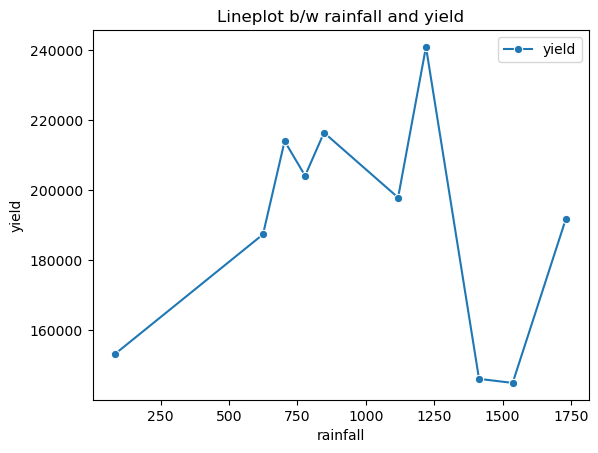

In [103]:
#observe relation b/w rainfall and yield via line plot
sns.lineplot(x=rainfall_yield_relation.index,y=rainfall_yield_relation.values,
             data=rainfall_yield_relation,marker='o',label='yield')
plt.title('Lineplot b/w rainfall and yield')
plt.xlabel('rainfall')
plt.ylabel('yield')
plt.show()

In [104]:
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.0,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.0,16.37,7000


In [106]:
# Rename columns for clarity
df_new = df.rename(columns={
    "average_rain_fall_mm_per_year": "Rainfall",
    "pesticides_tonnes": "Pesticides",
    "avg_temp": "Avg_Temp"
})

In [107]:
df_new.head()

,Area,Item,Year,Rainfall,Pesticides,Avg_Temp,yield
0,Albania,Maize,1990,1485.0,121.0,16.37,36613
1,Albania,Potatoes,1990,1485.0,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485.0,121.0,16.37,23333
3,Albania,Sorghum,1990,1485.0,121.0,16.37,12500
4,Albania,Soybeans,1990,1485.0,121.0,16.37,7000


In [108]:
# Encode categorical variables
#Making modification to account for cateogrical variables to better process in the algorithm
country = LabelEncoder()
crop = LabelEncoder()
df_new['Country_Encoded'] = country.fit_transform(df_new['Area'])
df_new['Crop_Encoded'] = crop.fit_transform(df_new['Item'])


In [111]:
# Define features and target variable
x = df_new[['Country_Encoded', 'Crop_Encoded', 'Pesticides', 'Avg_Temp', 'Rainfall']]
y = df_new['yield']

In [112]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [113]:
df_new.columns

Index(['Area', 'Item', 'Year', 'Rainfall', 'Pesticides', 'Avg_Temp', 'yield',
       'Country_Encoded', 'Crop_Encoded'],
      dtype='object')

In [114]:
print("Shapes of training data:")
print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("\nShapes of testing data:")
print("X_test:", x_test.shape)
print("y_test:", y_test.shape)

Shapes of training data:
X_train: (22593, 5)
y_train: (22593,)

Shapes of testing data:
X_test: (5649, 5)
y_test: (5649,)


In [123]:
#Machine Learning algorithm
#Random Forest 
treemodel = RandomForestRegressor(random_state=42)
treemodel.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [149]:
# Make predictions using the test features
y_pred = treemodel.predict(x_test)


In [125]:
#mean squared error 
mean_squared_error(y_test,y_pred)

196175930.97252038

In [126]:
#mean absolute error
mean_absolute_error(y_test,y_pred)

5628.164972093607

In [127]:
#root mean squared error
np.sqrt(mean_squared_error(y_test,y_pred))

14006.281839678952

In [128]:
# Calculate and print the R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9729549486438772


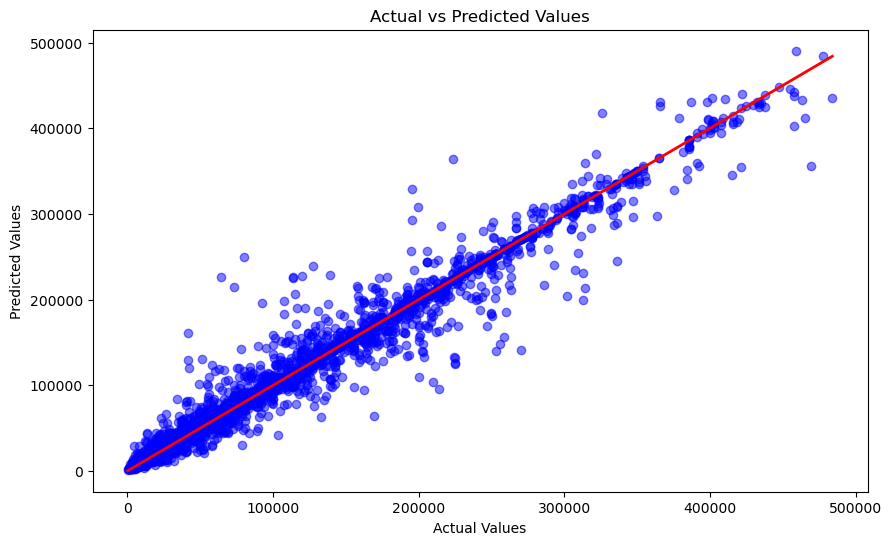

In [129]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [138]:
#Machine Learning algorithm
#Gradient Boosting Machine Learning method: LightGBM
train_data = lgb.Dataset(x_train,label=y_train)
test_data = lgb.Dataset(x_test,label=y_test)

In [139]:
#check the shapes of training and test
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (22593, 5)
Shape of y_train: (22593,)
Shape of X_test: (5649, 5)
Shape of y_test: (5649,)


In [140]:
#specifying paramters for LightGBM processing
parameters = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves':31,
    'learning_rate':0.05,
    'feature_fraction':0.9
}

In [141]:
#Performing LightGBM
lgbmodel = lgb.train(parameters, 
                     train_data,
                     num_boost_round=1000, 
                     valid_sets=[test_data],
                     callbacks=[lgb.early_stopping(stopping_rounds=10)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 22593, number of used features: 5
[LightGBM] [Info] Start training from score 77051.197760
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 2.31978e+08


In [143]:
#do prediction
y_pred = lgbmodel.predict(x_test)

In [145]:
#mean squared error
mean_squared_error(y_test, y_pred)

231977657.88088742

In [146]:
#root mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

15230.812778078765

In [148]:
# Calculate and print the R-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.9680192792267646


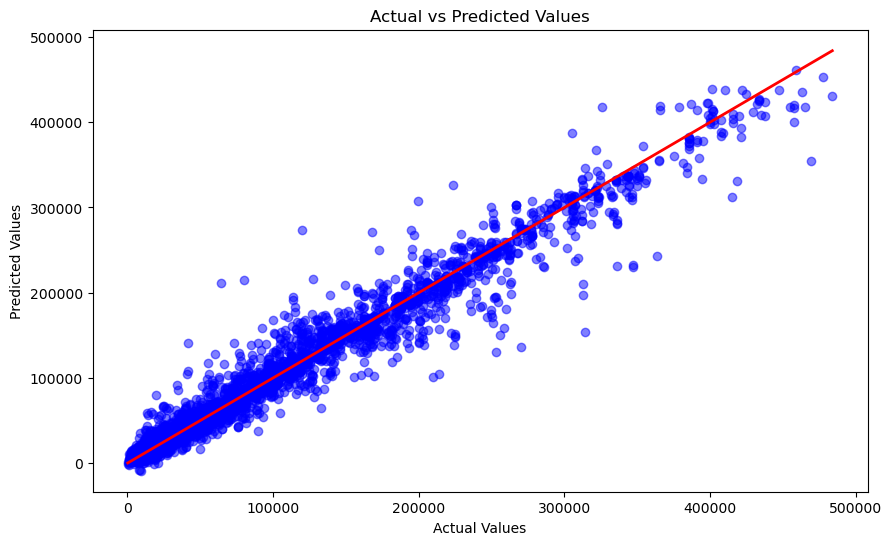

In [147]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()